#  Movie Recommender System (Filming)

- Recommender system used to suggest movies or songs or any other kind of products to users based on their interest, or usage history
- Applied Item-Based Collaborative Filter

### Dataset:
- Dataset MovieLens: https://grouplens.org/datasets/movielens/100k/

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing Dataset
movie_titles_df = pd.read_csv('Movie_Id_Titles')

In [4]:
movie_titles_df.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
movies_rating_df = pd.read_csv('u.data', sep = '\t', names = ['user_id','item_id','rating','timestamp'])

In [13]:
movies_rating_df.drop(['timestamp'], axis = 1, inplace = True)

In [14]:
movies_rating_df.head(5)

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [16]:
movies_rating_df['rating'].describe()

count    100003.000000
mean          3.529864
std           1.125704
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [17]:
movies_rating_df = pd.merge(movies_rating_df, movie_titles_df, on = 'item_id')

In [18]:
movies_rating_df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [20]:
movies_rating_df.shape # 100003 samples

(100003, 4)

In [22]:
movies_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [23]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']

In [24]:
ratings_df_mean.head(10)

title
'Til There Was You (1997)                      2.333333
1-900 (1994)                                   2.600000
101 Dalmatians (1996)                          2.908257
12 Angry Men (1957)                            4.344000
187 (1997)                                     3.024390
2 Days in the Valley (1996)                    3.225806
20,000 Leagues Under the Sea (1954)            3.500000
2001: A Space Odyssey (1968)                   3.969112
3 Ninjas: High Noon At Mega Mountain (1998)    1.000000
39 Steps, The (1935)                           4.050847
Name: mean, dtype: float64

In [26]:
ratings_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']

In [27]:
ratings_df_count.head(10)

title
'Til There Was You (1997)                        9.0
1-900 (1994)                                     5.0
101 Dalmatians (1996)                          109.0
12 Angry Men (1957)                            125.0
187 (1997)                                      41.0
2 Days in the Valley (1996)                     93.0
20,000 Leagues Under the Sea (1954)             72.0
2001: A Space Odyssey (1968)                   259.0
3 Ninjas: High Noon At Mega Mountain (1998)      5.0
39 Steps, The (1935)                            59.0
Name: count, dtype: float64

In [28]:
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1)

In [31]:
ratings_mean_count_df.reset_index().head(7)

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
5,2 Days in the Valley (1996),93.0,3.225806
6,"20,000 Leagues Under the Sea (1954)",72.0,3.500000


## Data Visualization:

<AxesSubplot:ylabel='Frequency'>

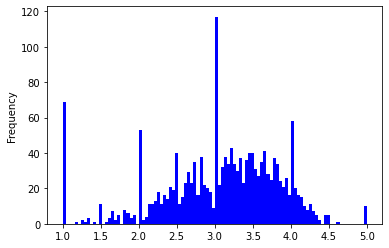

In [33]:
ratings_mean_count_df['mean'].plot(bins = 100, kind = 'hist', color = 'blue')

<AxesSubplot:ylabel='Frequency'>

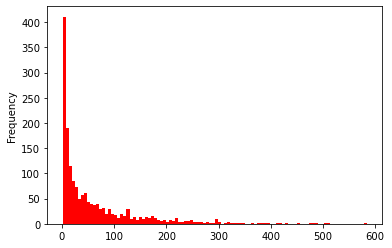

In [34]:
ratings_mean_count_df['count'].plot(bins = 100, kind = 'hist', color = 'red')

In [36]:
ratings_mean_count_df[ratings_mean_count_df['mean'] == 5 ].reset_index()

,title,count,mean
0,Aiqing wansui (1994),1.0,5.0
1,Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
2,"Great Day in Harlem, A (1994)",1.0,5.0
3,Marlene Dietrich: Shadow and Light (1996),1.0,5.0
4,Prefontaine (1997),3.0,5.0
5,"Saint of Fort Washington, The (1993)",2.0,5.0
6,Santa with Muscles (1996),2.0,5.0
7,Someone Else's America (1995),1.0,5.0
8,Star Kid (1997),3.0,5.0
9,They Made Me a Criminal (1939),1.0,5.0


In [38]:
ratings_mean_count_df.sort_values('count', ascending = False).head(7).reset_index()

,title,count,mean
0,Star Wars (1977),584.0,4.359589
1,Contact (1997),509.0,3.803536
2,Fargo (1996),508.0,4.155512
3,Return of the Jedi (1983),507.0,4.007890
4,Liar Liar (1997),485.0,3.156701
5,"English Patient, The (1996)",481.0,3.656965
6,Scream (1996),478.0,3.441423


## ITEM-BASED COLLABORATIVE FILTERING:

In [40]:
movies_rating_df.head(7)

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
5,274,50,5,Star Wars (1977)
6,227,50,4,Star Wars (1977)


In [41]:
userid_movietitle_matrix = movies_rating_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [44]:
userid_movietitle_matrix # We can find out which user watched which movie

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
titanic = userid_movietitle_matrix['Titanic (1997)']

In [47]:
titanic # The matrix shows who watched titanic and NaN stands for user never watchs titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [51]:
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns = ['Correlation'])

C:\Users\tsai2\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\tsai2\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [53]:
titanic_correlations.reset_index().head(7)

,title,Correlation
0,'Til There Was You (1997),-0.062017
1,1-900 (1994),NaN
2,101 Dalmatians (1996),0.120113
3,12 Angry Men (1957),0.077700
4,187 (1997),0.315654
5,2 Days in the Valley (1996),0.017295
6,"20,000 Leagues Under the Sea (1954)",0.246718


In [54]:
titanic_correlations = titanic_correlations.join(ratings_mean_count_df['count'])

In [56]:
titanic_correlations.reset_index().head(7)

,title,Correlation,count
0,'Til There Was You (1997),-0.062017,9.0
1,1-900 (1994),NaN,5.0
2,101 Dalmatians (1996),0.120113,109.0
3,12 Angry Men (1957),0.077700,125.0
4,187 (1997),0.315654,41.0
5,2 Days in the Valley (1996),0.017295,93.0
6,"20,000 Leagues Under the Sea (1954)",0.246718,72.0


In [58]:
titanic_correlations.dropna(inplace=True)

In [59]:
titanic_correlations.sort_values('Correlation', ascending = False)

,Correlation,count
title,,
Nadja (1994),1.0,8.0
"Pest, The (1997)",1.0,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
...,...,...
Pather Panchali (1955),-1.0,8.0
Angel Baby (1995),-1.0,4.0
Blood Beach (1981),-1.0,6.0


In [63]:
titanic_correlations[titanic_correlations['count']>50].sort_values('Correlation',ascending=False).head(7).reset_index()

,title,Correlation,count
0,Titanic (1997),1.000000,350.0
1,"Adventures of Robin Hood, The (1938)",0.597532,67.0
2,Mallrats (1995),0.580393,54.0
3,Robin Hood: Men in Tights (1993),0.533114,56.0
4,Manon of the Spring (Manon des sources) (1986),0.523459,58.0
5,Weekend at Bernie's (1989),0.508548,60.0
6,"River Wild, The (1994)",0.497600,146.0


In [64]:
# Item-based Collaborative Filter on Star Wars (1977)
starwars = userid_movietitle_matrix['Star Wars (1977)']
starwars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [67]:
# Adding correlation to the data frame
starwars_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(starwars), columns = ['Correlation'])
# Adding total count to the data frame
starwars_correlations = starwars_correlations.join(ratings_mean_count_df['count'])
# Drop missing values
starwars_correlations.dropna(inplace=True)
# Sort by the correlation with ascending order which shows highest correlation on the top
starwars_correlations.sort_values('Correlation', ascending = False)
# Show data frame
starwars_correlations.reset_index().head(7)

C:\Users\tsai2\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\tsai2\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,Correlation,count
0,'Til There Was You (1997),0.872872,9.0
1,1-900 (1994),-0.645497,5.0
2,101 Dalmatians (1996),0.211132,109.0
3,12 Angry Men (1957),0.184289,125.0
4,187 (1997),0.027398,41.0
5,2 Days in the Valley (1996),0.066654,93.0
6,"20,000 Leagues Under the Sea (1954)",0.289768,72.0


In [68]:
starwars_correlations[starwars_correlations['count']>50].sort_values('Correlation',ascending=False).head(7).reset_index()

,title,Correlation,count
0,Star Wars (1977),1.000000,584.0
1,"Empire Strikes Back, The (1980)",0.748353,368.0
2,Return of the Jedi (1983),0.672556,507.0
3,Raiders of the Lost Ark (1981),0.536117,420.0
4,Giant (1956),0.488093,51.0
5,"Life Less Ordinary, A (1997)",0.411638,53.0
6,Austin Powers: International Man of Mystery (1...,0.377433,130.0


## Create An Item-Based Collaborative Filter on the Entire Dataset：

In [70]:
userid_movietitle_matrix.head(7)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 50)
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,0.096546,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
myRatings = pd.read_csv('My_Ratings.csv')
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [74]:
myRatings['Movie Name'][0]

'Liar Liar (1997)'

In [76]:
similar_movies_list = pd.Series()

for i in range(0, 2):
    # Get same movies with same ratings
    similar_movie = movie_correlations[myRatings['Movie Name'][i]].dropna()
    
    # Scale the similarity by your given ratings
    similar_movie = similar_movie.map(lambda x: x * myRatings['Ratings'][i])
    
    similar_movies_list = similar_movies_list.append(similar_movie)   

<ipython-input-76-a1412db7e06a>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  similar_movies_list = pd.Series()


In [78]:
similar_movies_list.sort_values(inplace = True, ascending = False)
print(similar_movies_list.head(7))

Liar Liar (1997)         5.000000
Batman Forever (1995)    2.584838
Bean (1997)              2.523447
Mask, The (1994)         2.423249
Down Periscope (1996)    2.363403
Con Air (1997)           2.349141
Pretty Woman (1990)      2.348951
dtype: float64
